<a href="https://colab.research.google.com/github/chiranbc/ME_5920/blob/main/HW1_592_Chiran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 2 part 1**

In [1]:
!pip install einops

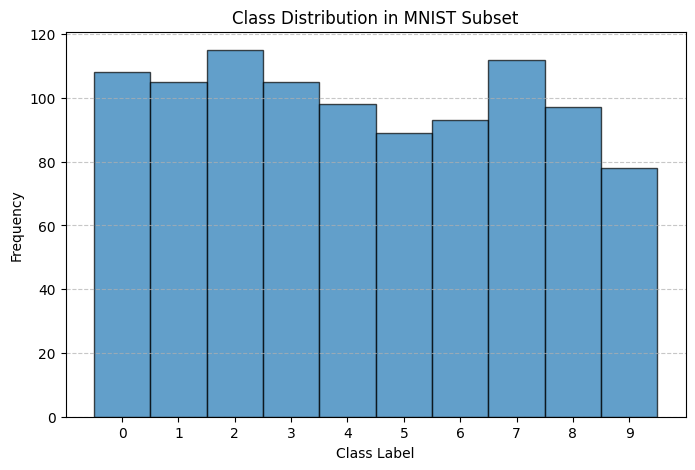

Original shape: torch.Size([1000, 1, 28, 28])
Batched shape: torch.Size([40, 25, 1, 28, 28])


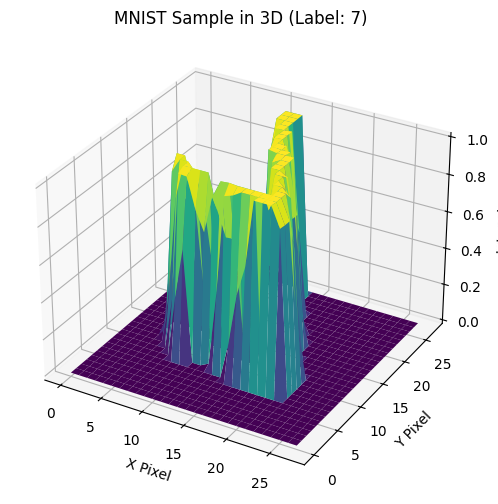

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange
from mpl_toolkits.mplot3d import Axes3D

# - Download MNIST & Create Subset -

# Transform: Convert MNIST images to tensors
transform = transforms.Compose([transforms.ToTensor()])
# Download and load the MNIST dataset
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# Select 1,000 random samples from MNIST
subset_indices = np.random.choice(len(mnist_dataset), 1000, replace=False)
mnist_subset = Subset(mnist_dataset, subset_indices)

# Extract images and labels
mnist_images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))])  # [1000, 1, 28, 28]
mnist_labels = torch.tensor([mnist_subset[i][1] for i in range(len(mnist_subset))])  # [1000]

# - Plot Histogram of Classes -

plt.figure(figsize=(8, 5))
plt.hist(mnist_labels.numpy(), bins=np.arange(11)-0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(10))  # Classes 0-9
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Class Distribution in MNIST Subset")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# - Batch Data Using Einops -

# Reshape from [1000, 1, 28, 28] → [40, 25, 1, 28, 28] (40 batches of 25)
mnist_batches = rearrange(mnist_images, '(b s) c h w -> b s c h w', b=40, s=25)

print(f"Original shape: {mnist_images.shape}")  # Expected: [1000, 1, 28, 28]
print(f"Batched shape: {mnist_batches.shape}")  # Expected: [40, 25, 1, 28, 28]

# - Plot a Random MNIST Image in 3D -

# Select a random image
random_index = np.random.randint(0, len(mnist_subset))
image, label = mnist_subset[random_index]
image = image.squeeze(0)  # Remove channel dimension

# Create X, Y grid
x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)
Z = image.numpy()  # Pixel intensity

# Plot 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X Pixel')
ax.set_ylabel('Y Pixel')
ax.set_zlabel('Intensity')
ax.set_title(f'MNIST Sample in 3D (Label: {label})')

plt.show()

# **Problem 2 part 2**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving energydata_complete.csv to energydata_complete.csv


In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


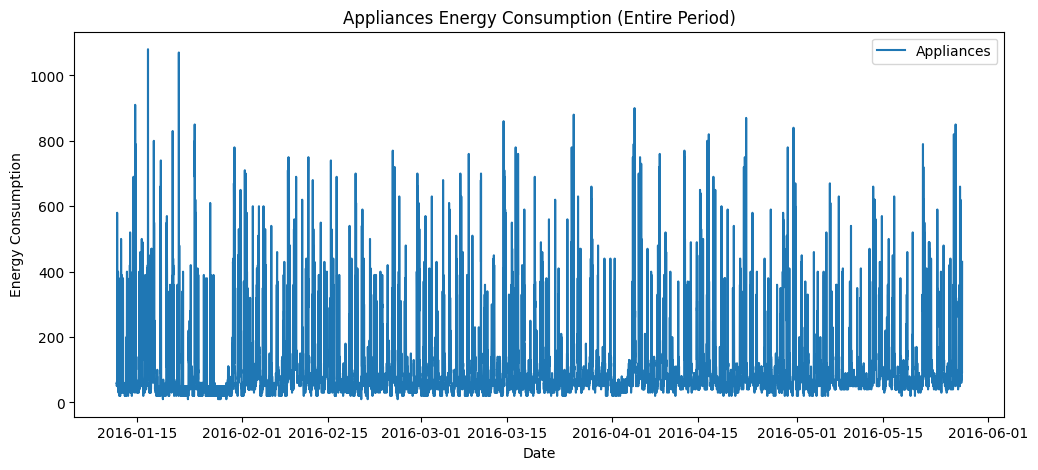

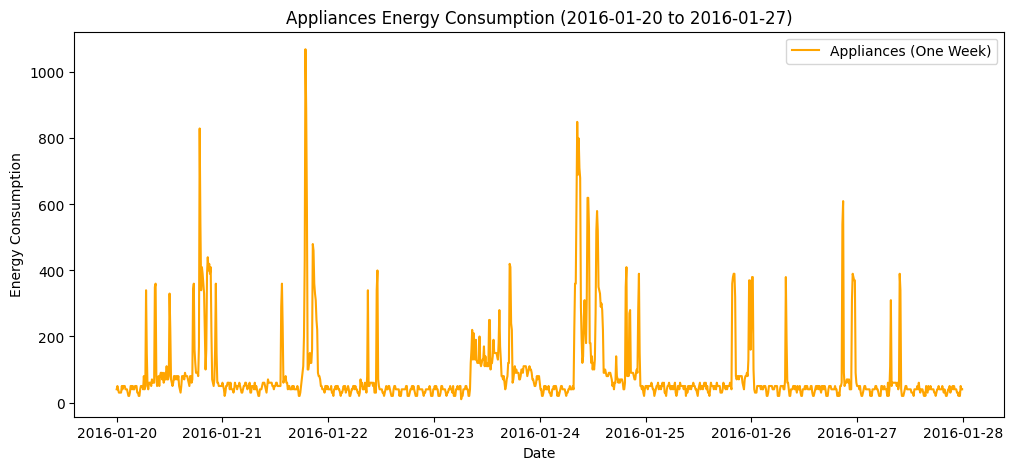

<ipython-input-11-41f489b6e4e9>:59: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_heatmap.pivot_table(index='day_of_week',


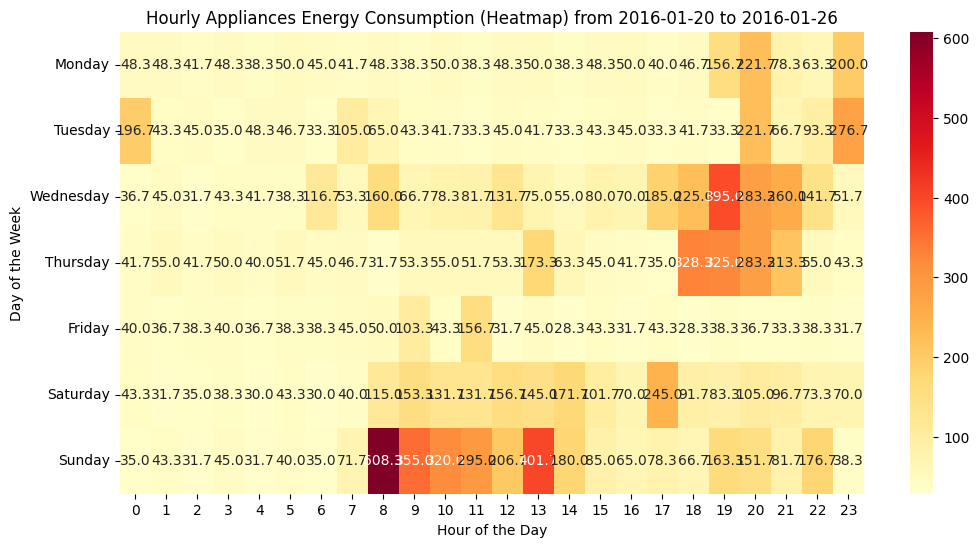

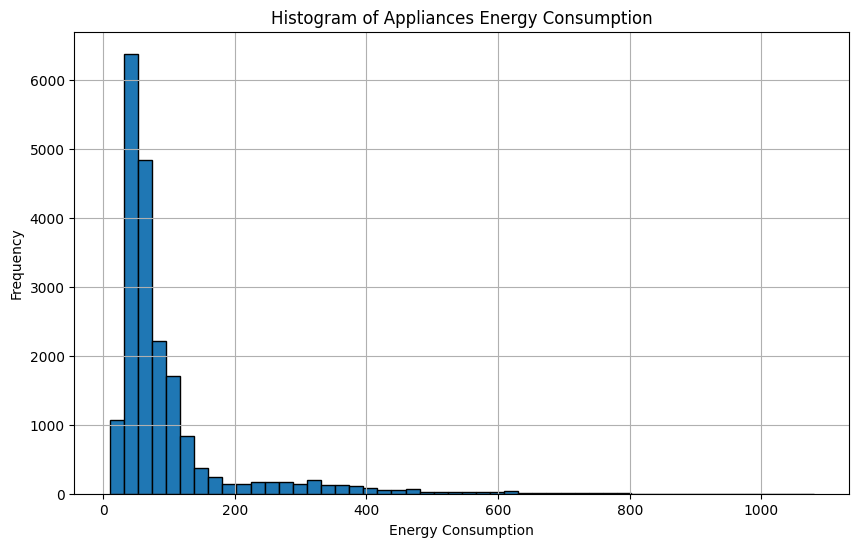

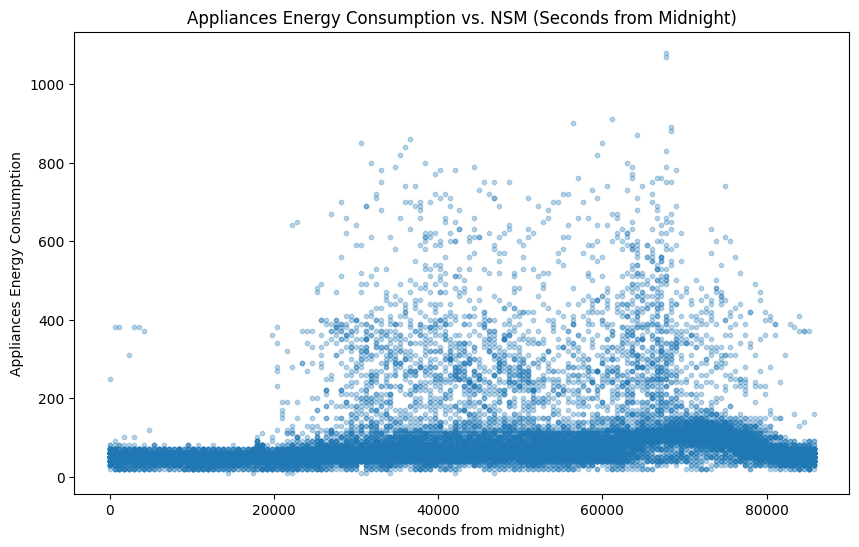

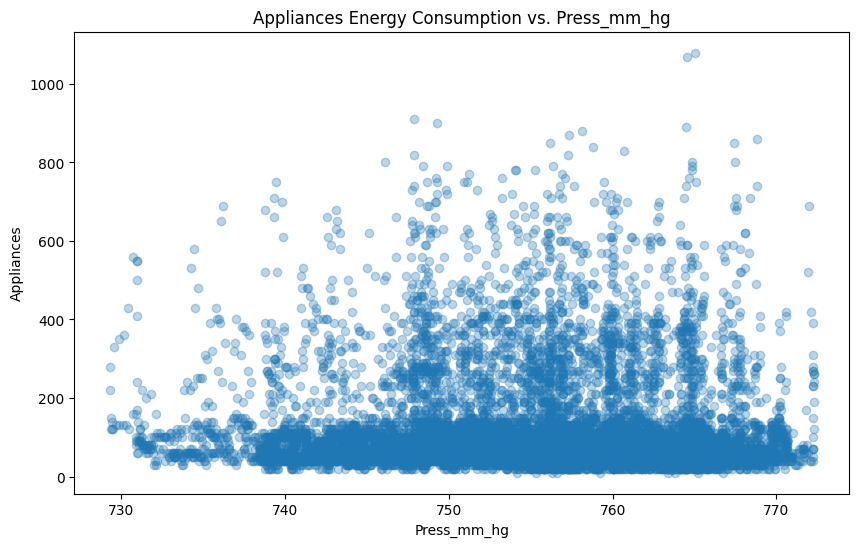


COMMENT ON NSM AND Press_mm_hg AS MAJOR CONTRIBUTING FACTORS:

1) NSM (Number of Seconds from Midnight):
   - NSM essentially represents time of day. Since human activity follows daily routines,
     time of day often drives energy usage (e.g., morning or evening peaks).
   - Therefore, NSM can capture diurnal patterns and occupant behavior, making it a strong
     predictor for appliance energy consumption.

2) Press_mm_hg (Atmospheric Pressure):
   - Pressure correlates with weather conditions, which, in turn, influence heating, cooling,
     or other appliance usage.
   - Weather changes can drive HVAC or other systems to run more frequently or intensively.
   - Hence, Press_mm_hg can indirectly capture weather-related variability and is also a
     strong predictor for energy consumption.

Overall, time-of-day effects (through NSM) and weather-related effects (through Press_mm_hg)
commonly stand out as primary influences on energy usage in a residential or commercial
environment.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset (ensure 'energydata_complete.csv' is present)
df = pd.read_csv('energydata_complete.csv')

# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# - Plot the applicance consumption for the entire time period -

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Appliances'], label='Appliances')
plt.title('Appliances Energy Consumption (Entire Period)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

# - Plot appliance consumption for one selected week -

# Choose any week (start_date and end_date):
start_date = '2016-01-20'
end_date   = '2016-01-27'

# Slice the dataframe for that week
one_week_df = df.loc[start_date:end_date]

plt.figure(figsize=(12, 5))
plt.plot(one_week_df.index, one_week_df['Appliances'], color='orange', label='Appliances (One Week)')
plt.title(f'Appliances Energy Consumption ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

# - Plot heatmap of hourly consumption for random week -

start_date_heatmap = '2016-01-20'
end_date_heatmap   = '2016-01-26'

week_df = df.loc[start_date_heatmap:end_date_heatmap]

# Resample from 10-min to hourly (mean)
hourly_df = week_df['Appliances'].resample('h').mean()

# Create a DataFrame suitable for pivoting
df_heatmap = pd.DataFrame(hourly_df)
df_heatmap['day_of_week'] = df_heatmap.index.day_name()
df_heatmap['hour']        = df_heatmap.index.hour

# Order days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_heatmap['day_of_week'] = pd.Categorical(df_heatmap['day_of_week'], categories=day_order, ordered=True)

# Pivot for heatmap
pivot_table = df_heatmap.pivot_table(index='day_of_week',
                                     columns='hour',
                                     values='Appliances',
                                     aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title(f'Hourly Appliances Energy Consumption (Heatmap) from {start_date_heatmap} to {end_date_heatmap}')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

# - Plot histogram of consumed appliances -

plt.figure(figsize=(10, 6))
df['Appliances'].hist(bins=50, edgecolor='black')
plt.title('Histogram of Appliances Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

# - Consrtuct NSM & plot energy consumption vs NSM -

# NSM (Number of Seconds from Midnight)
df['NSM'] = df.index.hour * 3600 + df.index.minute * 60 + df.index.second

plt.figure(figsize=(10, 6))
plt.scatter(df['NSM'], df['Appliances'], alpha=0.3, s=10)
plt.title('Appliances Energy Consumption vs. NSM (Seconds from Midnight)')
plt.xlabel('NSM (seconds from midnight)')
plt.ylabel('Appliances Energy Consumption')
plt.show()

# - Plot appliances conusmption vs Press_mm_hg -

# Check if 'Press_mm_hg' column exists in the dataset
if 'Press_mm_hg' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Press_mm_hg'], df['Appliances'], alpha=0.3)
    plt.title('Appliances Energy Consumption vs. Press_mm_hg')
    plt.xlabel('Press_mm_hg')
    plt.ylabel('Appliances')
    plt.show()
else:
    print("Column 'Press_mm_hg' not found in the dataframe. Skipping this plot.")

# - Comment on NSM & Press_mm_hg as major factors -

comment = """
COMMENT ON NSM AND Press_mm_hg AS MAJOR CONTRIBUTING FACTORS:

1) NSM (Number of Seconds from Midnight):
   - NSM essentially represents time of day. Since human activity follows daily routines,
     time of day often drives energy usage (e.g., morning or evening peaks).
   - Therefore, NSM can capture diurnal patterns and occupant behavior, making it a strong
     predictor for appliance energy consumption.

2) Press_mm_hg (Atmospheric Pressure):
   - Pressure correlates with weather conditions, which, in turn, influence heating, cooling,
     or other appliance usage.
   - Weather changes can drive HVAC or other systems to run more frequently or intensively.
   - Hence, Press_mm_hg can indirectly capture weather-related variability and is also a
     strong predictor for energy consumption.

Overall, time-of-day effects (through NSM) and weather-related effects (through Press_mm_hg)
commonly stand out as primary influences on energy usage in a residential or commercial
environment.
"""
print(comment)

# **Problem 2 part 3**

In [13]:
from google.colab import files
uploaded = files.upload()

Saving airfoil_self_noise.txt to airfoil_self_noise.txt


In [16]:
import pandas as pd

# Adjusting the file path:
df = pd.read_csv('airfoil_self_noise.txt',
                 sep='\s+',
                 header=None)

# 2. Name the columns
#      1) Frequency (Hz)
#      2) Angle of attack (degrees)
#      3) Chord length (meters)
#      4) Free-stream velocity (m/s)
#      5) Suction side displacement thickness (meters)
#      6) Scaled sound pressure level (dB) — the output
df.columns = [
    'Frequency (Hz)',
    'Angle of Attack (degrees)',
    'Chord Length (m)',
    'Free-Stream Velocity (m/s)',
    'Suction Side Displacement Thickness (m)',
    'Scaled Sound Pressure Level (dB)'
]

# 3. Compute descriptive statistics
stats_list = []
for col in df.columns:
    col_data = df[col]
    col_stats = {
        'Feature': col,
        'Mean': col_data.mean(),
        'Variance': col_data.var(),              # Sample variance
        'Std Dev': col_data.std(),               # Sample standard deviation
        'Median': col_data.median(),
        'Kurtosis': col_data.kurtosis(),         # or col_data.kurt()
        'Skewness': col_data.skew(),
        'Range': col_data.max() - col_data.min()
    }
    stats_list.append(col_stats)

# Convert stats_list to a DataFrame for a neat display
summary_df = pd.DataFrame(stats_list)
print(summary_df)

                                   Feature         Mean      Variance  \
0                           Frequency (Hz)  2886.380572  9.938717e+06   
1                Angle of Attack (degrees)     6.782302  3.502424e+01   
2                         Chord Length (m)     0.136548  8.749868e-03   
3               Free-Stream Velocity (m/s)    50.860745  2.425116e+02   
4  Suction Side Displacement Thickness (m)     0.011140  1.729287e-04   
5         Scaled Sound Pressure Level (dB)   124.835943  4.759146e+01   

       Std Dev       Median  Kurtosis  Skewness         Range  
0  3152.573137  1600.000000  5.708685  2.137084  19800.000000  
1     5.918128     5.400000 -0.412951  0.689164     22.200000  
2     0.093541     0.101600 -1.037964  0.457457      0.279400  
3    15.572784    39.600000 -1.563951  0.235852     39.600000  
4     0.013150     0.004957  2.218903  1.702165      0.058011  
5     6.898657   125.721000 -0.314187 -0.418952     37.607000  
